#Neural Network From scratch

In [1]:
# import all necessary libraries 

import numpy as np                                    # For matrices and MATLAB like functions                  
from sklearn.model_selection import train_test_split  # To split data into train and test set


# for plotting graphs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Data Equation

Input Feature Vector : $\Large x = [x_1 ,  x_2]^T$ 
<br>
Target Variable : $\Large y$ 
<br>
$$\Large  y = x_1^2 + x_2^3 + x_1x_2$$

# Random Data Generation

In [2]:
n_samples = 1500
X = np.random.uniform(-5,5, (2, n_samples) ).astype(np.float32)
Y = (X[0, :]**2 + X[1,:]**3 + X[0,:]*X[1,:]).astype(np.float32)

## Data split

In [3]:
trainX, testX, trainY, testY = train_test_split(X.T, Y, test_size=0.33, random_state=42)


trainX = trainX.reshape(trainX.shape[0], trainX.shape[1], 1 )
testX  = testX.reshape(testX.shape[0], testX.shape[1], 1 )

trainY = trainY.reshape(trainY.shape[0], 1, 1 )
testY  = testY.reshape(testY.shape[0], 1 ,1)


print("Shape of Train Data:")
print("TrainX: " , trainX.shape)
print("TrainY: " , trainY.shape)



print("\nShape of Test Data:")
print("TestX: " , testX.shape)
print("TestY: " , testY.shape)

Shape of Train Data:
TrainX:  (1005, 2, 1)
TrainY:  (1005, 1, 1)

Shape of Test Data:
TestX:  (495, 2, 1)
TestY:  (495, 1, 1)


---

## NeuralNetwork with Numpy
### Feed Forward and Backpropagation

We will implement 3-layer neural network for regression. Following are the equations for feed forward through network. We are using sigmoid as activation function and mean-squared-error as loss.

$$\Large z_1  = W_1 x + b_1$$
$$\Large h_1  = \sigma(z_1)$$

<br>
<br>

$$\Large z_2  = W_2 h_1 + b_2$$
$$\Large h_2  = \sigma(z_2)$$

<br>
<br>

$$\Large \hat{y}  = W_3 h_2 + b_3$$


<br>
<br>

$$\Large loss  = \frac{1}{N}\sum_{i=1}^{N} (y_i - \hat{y_i})^2 $$
<center>where N is batch size</center>

# Defing Class of Neural Network


In [4]:
class NeuralNetwork(object):        
    
    """
    We will implement neural network as a python class. 
    Object of this class will have a few attributes for example learnable parameters
    and functions such as forward(), backward_propagate() etc.
    
    """
    
    # Initialize attributes of object
    def __init__(self,  input_size = 2 , hidden_size = 3 , output_size = 1 ):        
        
        
        self.input_size  = input_size
        self.hidden_size = hidden_size 
        self.output_size = output_size
        
        
        # Learnable weights of neural network
        self.W1 = np.random.rand( hidden_size , input_size  ) # randomly initialize W1 matrix
        self.b1 = np.random.rand( hidden_size , 1           ) # randomly initialize b1 vector
        
        
        self.W2 = np.random.rand( hidden_size , hidden_size ) # randomly initialize W2 matrix
        self.b2 = np.random.rand( hidden_size , 1           ) # randomly initialize b2 vector
        
        self.W3 = np.random.rand( output_size , hidden_size ) # randomly initialize W3 matrix
        self.b3 = np.random.rand( output_size , 1           ) # randomly initialize b3 vector
        
        
        # Non-learnable parameters of neural network. These parameters are used in back-propagation
        self.z1 = np.zeros( (hidden_size , 1) ) 
        self.h1 = np.zeros( (hidden_size , 1) ) 
        
        self.z2 = np.zeros( (hidden_size , 1) ) 
        self.h2 = np.zeros( (hidden_size , 1) ) 
          
    
    
    
    # This function just prints a few properties of object created from this class    
    def __str__(self):
        
        msg = "NeuralNetwork:\n\nSize of Input Layer = " + str(self.input_size) + "\nSize of 1st Hidden Layer  = " + str(self.hidden_size)+ "\nSize of 2nd Hidden Layer  = " + str(self.hidden_size)+ "\nSize of Output Layer  = " + str(self.output_size)
                
        return  msg
        
       
    
    
    
    
        
    # Forward propagation through neural network   
    def forward(self, x):
        
        
        self.z1  = (self.W1 @ x ) + self.b1         # @ operator is used for standard matrix-multiplication 
        
        self.h1  = self.sigmoid(self.z1)            # element-wise operation on vector
        
        
        # complete forward operation
        
        self.z2  = (self.W2 @ self.h1 ) + self.b2         # @ operator is used for standard matrix-multiplication 
        
        self.h2  = self.sigmoid(self.z2)            # element-wise operation on vector
        
        y_hat = (self.W3 @ self.h2 ) + self.b3
        
        
        return y_hat  

    
    
    
    
    # Backward propagation through neural network
    def backward(self , y_hat , x , y , lr):

        
        
        
        batch_size = y_hat.shape[0]
        
        
        # Zero-out all gradients
        grad_b3 = np.zeros((batch_size, self.b3.shape[0], self.b3.shape[1] ))
        grad_W3 = np.zeros((batch_size, self.W3.shape[0], self.W3.shape[1] ))
        
        grad_b2 = np.zeros((batch_size, self.b2.shape[0], self.b2.shape[1] ))
        grad_W2 = np.zeros((batch_size, self.W2.shape[0], self.W2.shape[1] ))
        
        grad_b1 = np.zeros((batch_size, self.b1.shape[0], self.b1.shape[1] ))
        grad_W1 = np.zeros((batch_size, self.W1.shape[0], self.W1.shape[1] ))
        
        
        
     
        # Complete back propagation ...
        grad_b3 = (-2/batch_size)*(y - y_hat)
       
        for i in range(batch_size):    
            grad_W3[i,:,:] = (grad_b3[i,:,:]*((self.h2)[i,:,:])).T
       
        
        
        for i in range(batch_size):
            grad_b2[i,:,:] = (((grad_b3[i,:,:]*self.W3).T)*(self.h2[i,:,:]*(1-self.h2[i,:,:])))
       
        for i in range(batch_size):
            grad_W2[i,:,:] = grad_b2[i,:,:].dot((self.h1[i,:,:]).T)
      
        
        
        for i in range(batch_size):
            grad_b1[i,:,:] = (((grad_b2[i,:,:].T).dot(self.W2))).T*(self.h1[i,:,:]*(1-self.h1[i,:,:]))
        
        for i in range(batch_size):
            grad_W1[i,:,:] = (grad_b1[i,:,:]).dot(x[i,:,:].T) 
       
        
        
        
        
        # Record gradients for all examples in given batch
        
            
            
        # Take average along batch dimension
        #t is accelration factor
        t=15 
        grad_W1 = grad_W1.sum(axis = 0) / (batch_size/t)
        grad_b1 = grad_b1.sum(axis = 0) / (batch_size/t)
        
        grad_W2 = grad_W2.sum(axis = 0) / (batch_size/t)
        grad_b2 = grad_b2.sum(axis = 0) / (batch_size/t)
        
        grad_W3 = grad_W3.sum(axis = 0) / (batch_size/t)
        grad_b3 = grad_b3.sum(axis = 0) / (batch_size/t)
        


        
        # Gradient Descent
        # Update weights and biases using gradients
        
        self.W3 = self.W3 - lr*grad_W3
        self.b3 = self.b3 - lr*grad_b3
        
        
        self.W2 = self.W2 - lr*grad_W2
        self.b2 = self.b2 - lr*grad_b2

        self.W1 = self.W1 - lr*grad_W1
        self.b1 = self.b1 - lr*grad_b1

        


    
    
    
    def sigmoid(self, x):
        # Activation Function
                
        sig_x = np.zeros(x.shape)
        
        # protection from overflow and underflow
        low_x = -30
        up_x  = 30
        
        sig_x[x< low_x]=0
        sig_x[x> up_x ]=1
        
        safe_x = x[(x>= low_x) & (x<= up_x)]
        sig_x[(x>= low_x) & (x<= up_x)] = np.exp(safe_x)/(1+np.exp(safe_x))
        
                
        return sig_x
            
        
        
        
    def mse_loss(self, y, y_hat):
        # Mean Square Error Loss
        
        loss  =  ((y-y_hat)**2).mean(axis=0)
        
        return loss
 

## Train Neural Network

NeuralNetwork:

Size of Input Layer = 2
Size of 1st Hidden Layer  = 16
Size of 2nd Hidden Layer  = 16
Size of Output Layer  = 1


Training...
Epoch =   0   Loss = 2181.929
Epoch =   1   Loss = 1662.434
Epoch =   2   Loss = 1267.269
Epoch =   3   Loss = 1043.464
Epoch =   4   Loss = 934.243
Epoch =   5   Loss = 832.999
Epoch =   6   Loss = 734.325
Epoch =   7   Loss = 594.704
Epoch =   8   Loss = 479.171
Epoch =   9   Loss = 466.633
Epoch =  10   Loss = 427.477
Epoch =  11   Loss = 373.574
Epoch =  12   Loss = 371.740
Epoch =  13   Loss = 278.882
Epoch =  14   Loss = 274.310
Epoch =  15   Loss = 311.145
Epoch =  16   Loss = 268.996
Epoch =  17   Loss = 227.019
Epoch =  18   Loss = 233.301
Epoch =  19   Loss = 194.741
Epoch =  20   Loss = 159.982
Epoch =  21   Loss = 178.926
Epoch =  22   Loss = 148.118
Epoch =  23   Loss = 178.492
Epoch =  24   Loss = 176.821
Epoch =  25   Loss = 142.332
Epoch =  26   Loss = 120.596
Epoch =  27   Loss = 175.479
Epoch =  28   Loss = 180.834
Epoch =  29  

Epoch = 288   Loss = 9.082
Epoch = 289   Loss = 12.593
Epoch = 290   Loss = 8.536
Epoch = 291   Loss = 7.438
Epoch = 292   Loss = 11.397
Epoch = 293   Loss = 10.518
Epoch = 294   Loss = 8.268
Epoch = 295   Loss = 8.188
Epoch = 296   Loss = 8.003
Epoch = 297   Loss = 14.956
Epoch = 298   Loss = 8.680
Epoch = 299   Loss = 7.819
Epoch = 300   Loss = 7.799
Epoch = 301   Loss = 9.319
Epoch = 302   Loss = 10.134
Epoch = 303   Loss = 7.870
Epoch = 304   Loss = 7.044
Epoch = 305   Loss = 9.255
Epoch = 306   Loss = 10.452
Epoch = 307   Loss = 10.184
Epoch = 308   Loss = 9.401
Epoch = 309   Loss = 9.656
Epoch = 310   Loss = 7.350
Epoch = 311   Loss = 7.074
Epoch = 312   Loss = 9.008
Epoch = 313   Loss = 17.944
Epoch = 314   Loss = 8.741
Epoch = 315   Loss = 7.316
Epoch = 316   Loss = 7.526
Epoch = 317   Loss = 7.495
Epoch = 318   Loss = 7.034
Epoch = 319   Loss = 7.110
Epoch = 320   Loss = 7.698
Epoch = 321   Loss = 5.898
Epoch = 322   Loss = 6.401
Epoch = 323   Loss = 6.068
Epoch = 324   Loss =

Epoch = 593   Loss = 3.239
Epoch = 594   Loss = 4.364
Epoch = 595   Loss = 7.371
Epoch = 596   Loss = 5.245
Epoch = 597   Loss = 5.156
Epoch = 598   Loss = 3.263
Epoch = 599   Loss = 2.693
Epoch = 600   Loss = 2.698
Epoch = 601   Loss = 2.649
Epoch = 602   Loss = 2.553
Epoch = 603   Loss = 2.953
Epoch = 604   Loss = 11.042
Epoch = 605   Loss = 5.793
Epoch = 606   Loss = 8.047
Epoch = 607   Loss = 6.295
Epoch = 608   Loss = 7.084
Epoch = 609   Loss = 5.017
Epoch = 610   Loss = 7.141
Epoch = 611   Loss = 2.870
Epoch = 612   Loss = 5.018
Epoch = 613   Loss = 5.925
Epoch = 614   Loss = 2.487
Epoch = 615   Loss = 3.580
Epoch = 616   Loss = 2.212
Epoch = 617   Loss = 2.138
Epoch = 618   Loss = 2.018
Epoch = 619   Loss = 1.946
Epoch = 620   Loss = 1.895
Epoch = 621   Loss = 1.859
Epoch = 622   Loss = 1.831
Epoch = 623   Loss = 1.809
Epoch = 624   Loss = 1.790
Epoch = 625   Loss = 1.774
Epoch = 626   Loss = 1.759
Epoch = 627   Loss = 1.745
Epoch = 628   Loss = 1.733
Epoch = 629   Loss = 1.721


Epoch = 898   Loss = 1.477
Epoch = 899   Loss = 1.427
Epoch = 900   Loss = 1.385
Epoch = 901   Loss = 1.350
Epoch = 902   Loss = 1.319
Epoch = 903   Loss = 1.291
Epoch = 904   Loss = 1.266
Epoch = 905   Loss = 1.242
Epoch = 906   Loss = 1.220
Epoch = 907   Loss = 1.198
Epoch = 908   Loss = 1.175
Epoch = 909   Loss = 1.149
Epoch = 910   Loss = 1.120
Epoch = 911   Loss = 1.085
Epoch = 912   Loss = 1.044
Epoch = 913   Loss = 1.002
Epoch = 914   Loss = 0.966
Epoch = 915   Loss = 0.946
Epoch = 916   Loss = 0.926
Epoch = 917   Loss = 0.907
Epoch = 918   Loss = 0.946
Epoch = 919   Loss = 1.098
Epoch = 920   Loss = 0.948
Epoch = 921   Loss = 0.972
Epoch = 922   Loss = 2.176
Epoch = 923   Loss = 3.288
Epoch = 924   Loss = 2.701
Epoch = 925   Loss = 1.966
Epoch = 926   Loss = 1.118
Epoch = 927   Loss = 0.995
Epoch = 928   Loss = 0.974
Epoch = 929   Loss = 0.939
Epoch = 930   Loss = 0.892
Epoch = 931   Loss = 0.886
Epoch = 932   Loss = 1.014
Epoch = 933   Loss = 1.299
Epoch = 934   Loss = 1.202
E

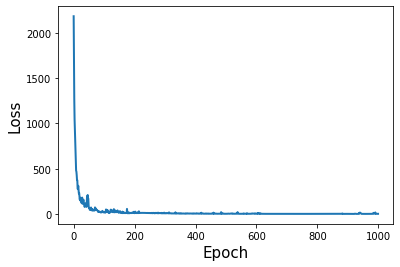

In [5]:
MyNeuralNet = NeuralNetwork( input_size = 2 , hidden_size = 16 , output_size = 1 )


print(MyNeuralNet)

lr = 0.01

n_epochs = 1000

n_examples = trainX.shape[0]

batch_size = 25

n_batches = n_examples//batch_size

epoch_loss = []


print("\n\nTraining...")
for epoch in range(n_epochs):
    
    loss=0
    
    for i in range(n_batches):
        
        x = trainX[(i*batch_size):(i*batch_size+batch_size)]
        y = trainY[(i*batch_size):(i*batch_size+batch_size)]
        
        # Forward Pass
        y_hat = MyNeuralNet.forward( x )
        
        loss = loss+MyNeuralNet.mse_loss(y,y_hat)
        
        # Backpropagation
        MyNeuralNet.backward( y_hat , x , y , lr)
        
    epoch_loss.append(loss.squeeze()/n_batches)
    print("Epoch = %3d   Loss = %3.3f"%(epoch, epoch_loss[epoch]) )

print("\nDone training.")
plt.plot(epoch_loss, linewidth=2)
plt.xlabel("Epoch", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.show()


## Prediction (Task 5)

In [6]:
y_pred = MyNeuralNet.forward(testX)

# Plot Difference  (Task 6)

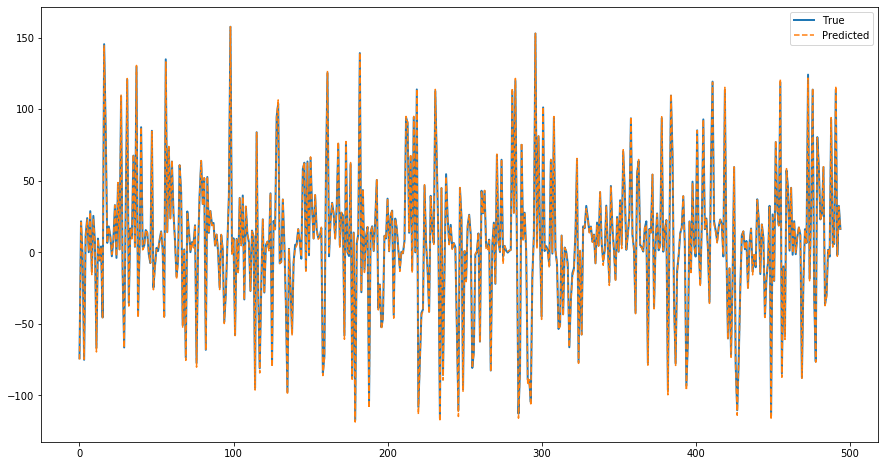

In [7]:
plt.figure(figsize=(15,8))
plt.plot(testY.squeeze(), linewidth=2 , label="True")
plt.plot(y_pred.squeeze(), linestyle="--",  label="Predicted")
plt.legend()
plt.show()